In [1]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



Shape of the DataFrame: (178, 2)


<Figure size 1152x576 with 0 Axes>

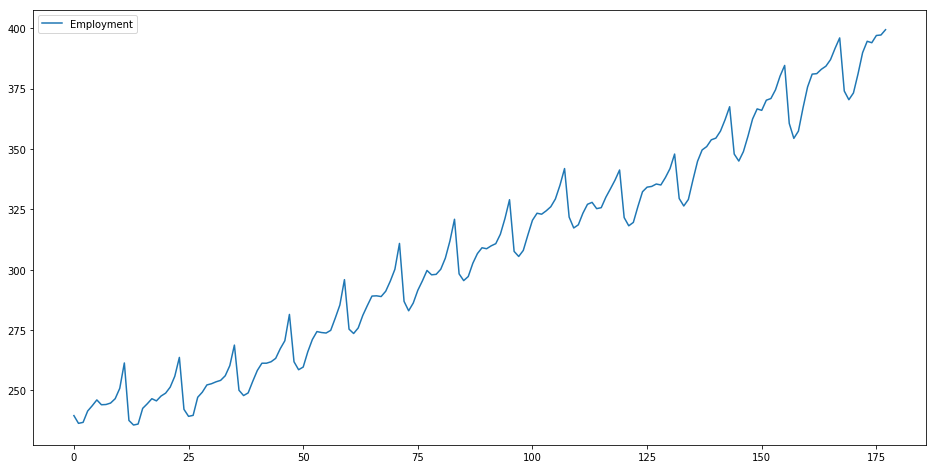

In [9]:
# Change working Directory
os.chdir('../Data Files')

#read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv('wisconsin-employment-time-series.csv')

#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)

#Let's see first 10 rows of it
wisc_emp.head()

# plot the wisconsin employment dataset
wisc_emp.plot(figsize=(16,8))

In [ ]:
# Capture seasonality component
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

initialize_T(wisc_emp['Employment'], 12)

# Initialize seasonal trend
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    # Compute season average
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    
    # compute season intial values
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons
            
initialize_seasonalilty(wisc_emp['Employment'], 12)   
        

# Triple Exponential Smoothing Forecast
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat



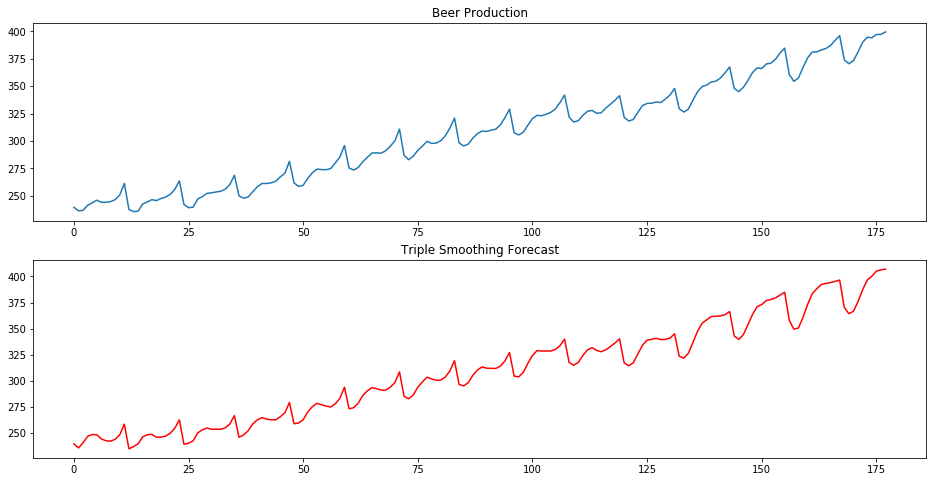

In [5]:
# Triple exponential smoothing
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)

### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(2,1,1)
wisc_emp['Employment'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
wisc_emp['TES'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')
plt.savefig('../plots/ch3/B07887_03_16.png', format='png', dpi=300)

\begin{equation}
F_t = \alpha(x_t + S_{t-L})+(1-\alpha)(F_{t-1}+T_{t-1}) 
\end{equation}

\begin{equation}
T_t = \beta(F_t - F_{t-1}) + (1-\beta)(T_{t-1})
\end{equation}

\begin{equation}
S_t = \gamma(x_t - F_t) + (1-\gamma)S_{t-C}
\end{equation}

In [10]:
# Effect of alpha and beta
wisc_emp['TEF001'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 0, 0, 1, 0)
wisc_emp['TEF010'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 0, 1, 0, 0)
wisc_emp['TEF100'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 0, 0, 0)


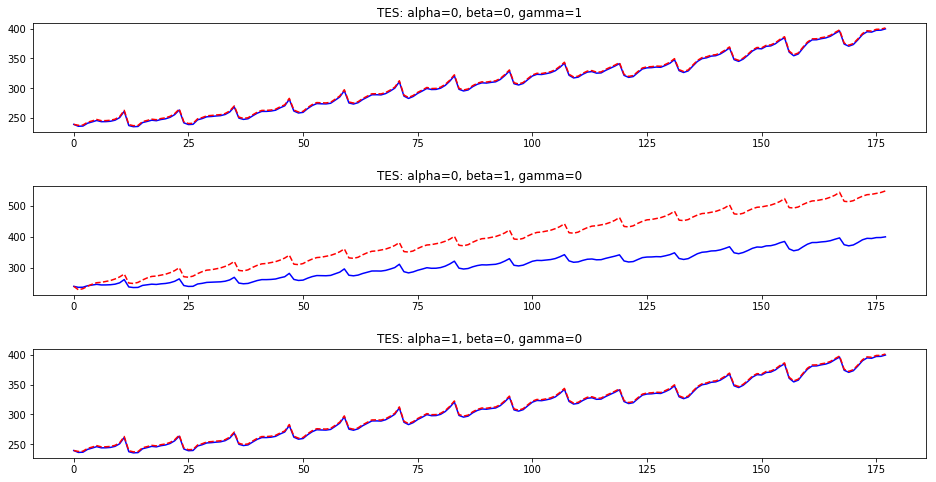

In [21]:
# Plot alpha=0, beta=0, gamma=1
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF001'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=0, gamma=1')
ax = fig.add_subplot(3,1,2)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF010'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=1, gamma=0')
ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF100'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=0')
fig.subplots_adjust(hspace=.5)
plt.savefig('../plots/ch3/B07887_02_16.png', format='png', dpi=300)


In [25]:
# Effect of alpha and beta
wisc_emp['TEF110'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 1, 0, 0)
wisc_emp['TEF101'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 0, 1, 0)
wisc_emp['TEF111'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 1, 1, 0)

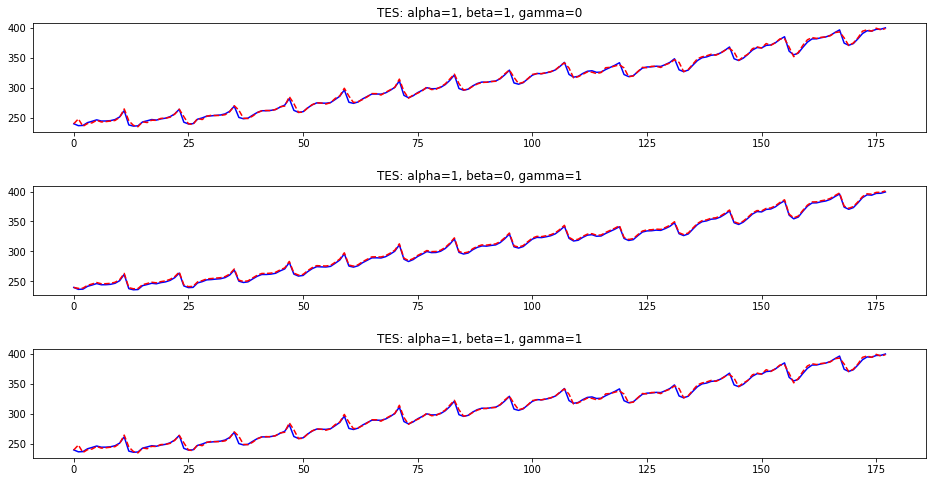

In [27]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF110'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=1, gamma=0')
ax = fig.add_subplot(3,1,2)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF101'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=1')
ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF111'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=1, gamma=1')
fig.subplots_adjust(hspace=.5)
plt.savefig('../plots/ch3/B07887_01_16.png', format='png', dpi=300)